Exercício 1 –  A partir da base de dados  propaganda (2).csv Download propaganda (2).csv faça um modelo de regressão múltipla para predizer as vendas:

1 – Análise descritiva

2 – Calculo de correlação e covariância

3 – Faça o modelo de regressão

4 – Realize a análise de resíduos

5 – Análise de multicolinearidade

6 – Análise do Modelo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [33]:
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv('../../data/propaganda (2).csv')
df.head()


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## 1. Análise descritiva


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [35]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Jornal,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Vendas,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


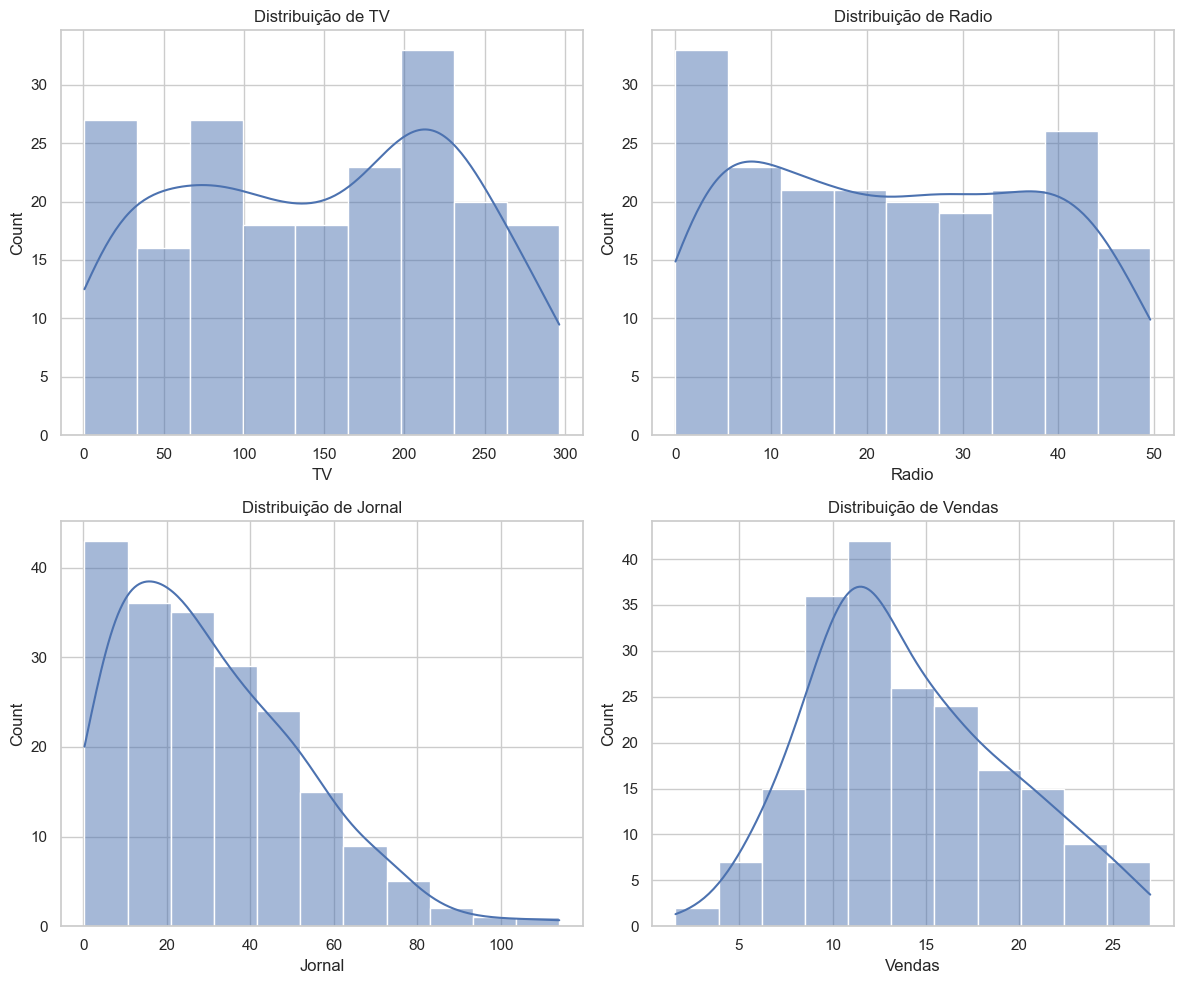

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, column in zip(axes, df.columns):
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(f"Distribuição de {column}")

plt.tight_layout()
plt.show()


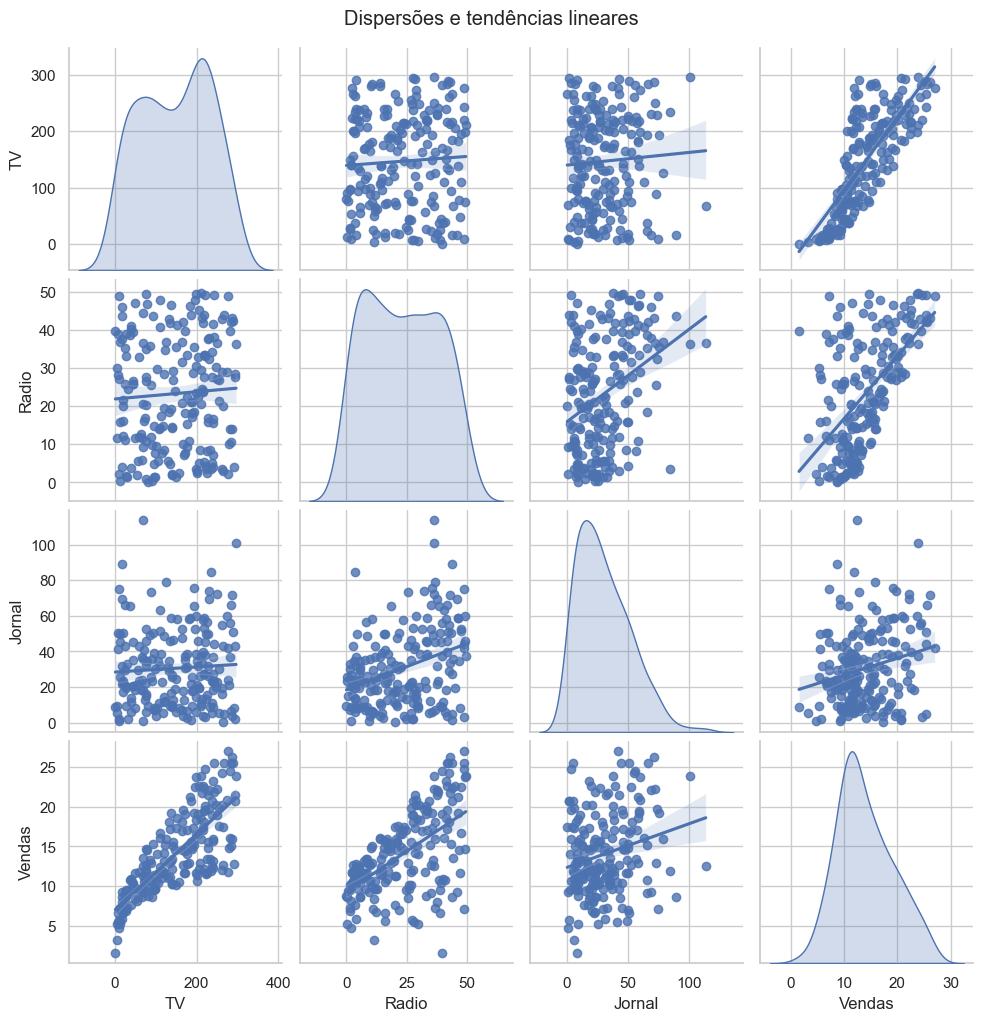

In [37]:
sns.pairplot(df, kind="reg", diag_kind="kde")
plt.suptitle("Dispersões e tendências lineares", y=1.02)
plt.show()


## 2. Correlação e covariância
Calculamos as matrizes de correlação de Pearson e de covariância para examinar relacionamentos lineares entre as variáveis.


In [38]:
corr_matrix = df.corr()
cov_matrix = df.cov()

corr_matrix


,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Jornal,0.056648,0.354104,1.000000,0.228299
Vendas,0.782224,0.576223,0.228299,1.000000


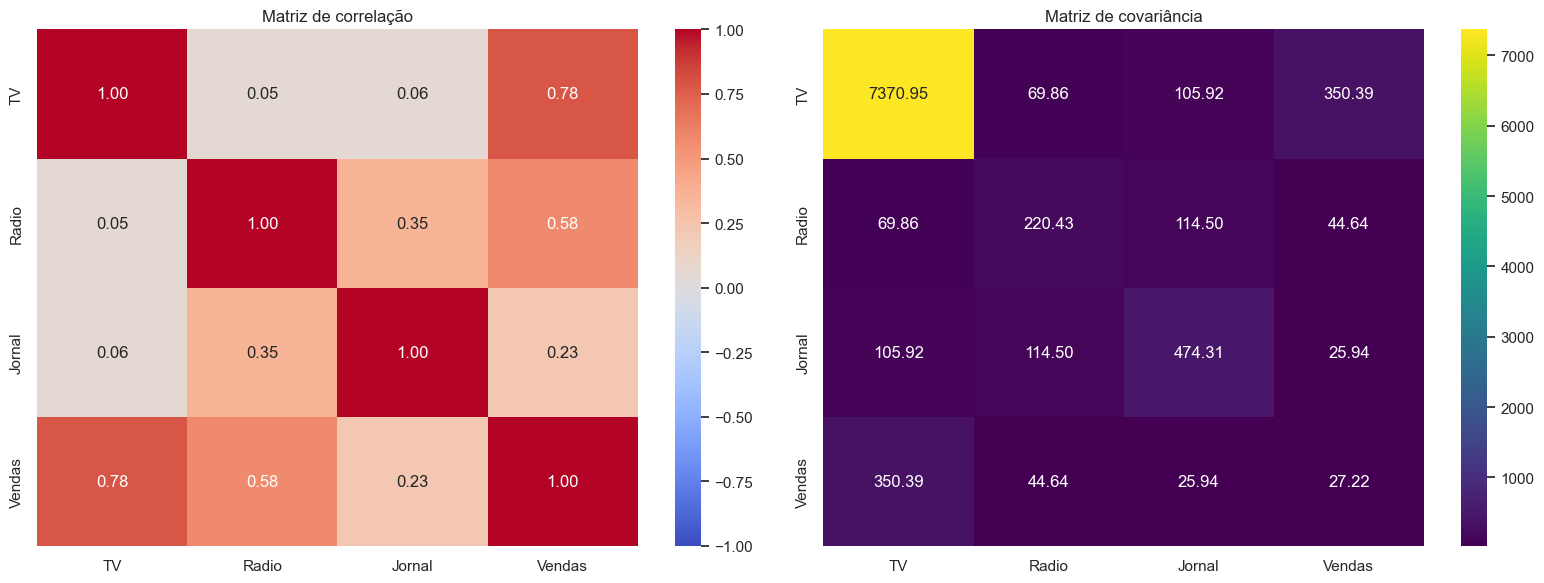

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("Matriz de correlação")

sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="viridis", ax=axes[1])
axes[1].set_title("Matriz de covariância")

plt.tight_layout()
plt.show()


## 3. Modelo de regressão múltipla


In [ ]:
X = df[["TV", "Radio", "Jornal"]]
y = df["Vendas"]


df_with_const = sm.add_constant(X)
model = sm.OLS(y, df_with_const)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Vendas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.58e-96
Time:                        11:24:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Jornal        -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. Análise dos resíduos


In [41]:
df_residuals = pd.DataFrame({
    "y_true": y,
    "y_pred": results.fittedvalues,
    "residuals": results.resid
})

df_residuals.head()


,y_true,y_pred,residuals
0,22.1,20.523974,1.576026
1,10.4,12.337855,-1.937855
2,9.3,12.307671,-3.007671
3,18.5,17.597830,0.902170
4,12.9,13.188672,-0.288672


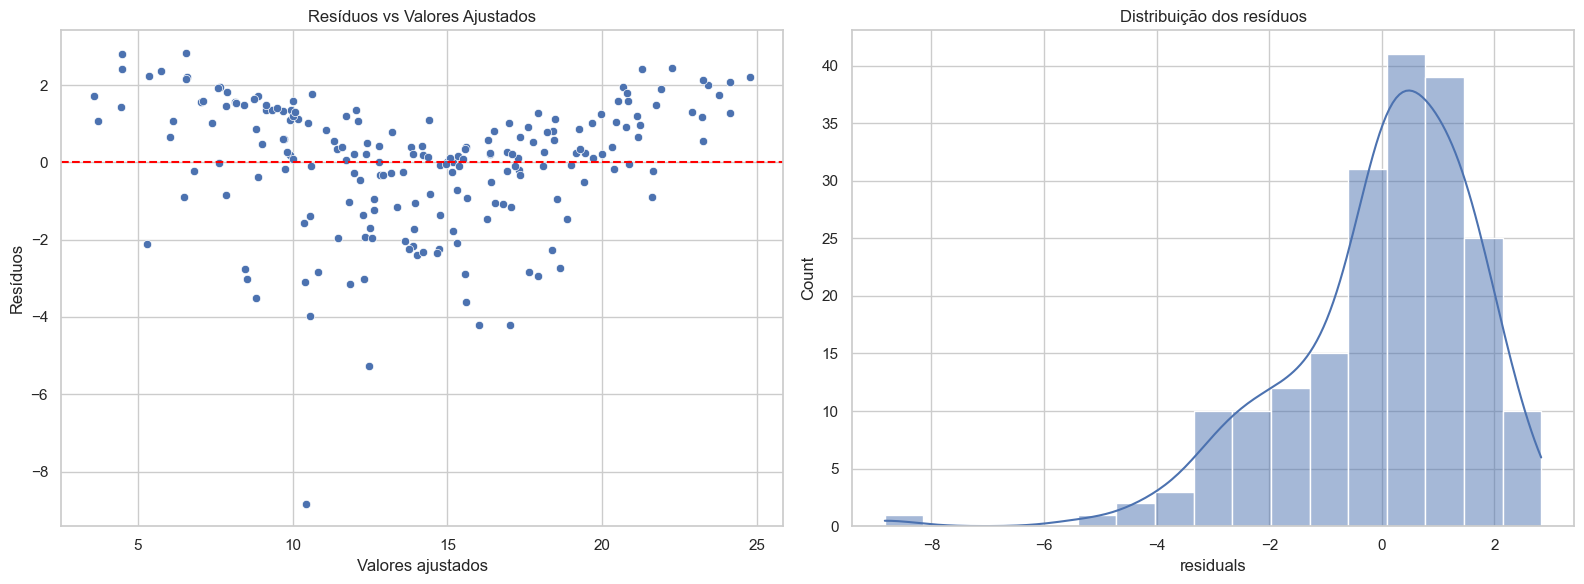

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x="y_pred", y="residuals", data=df_residuals, ax=axes[0])
axes[0].axhline(0, color="red", linestyle="--")
axes[0].set_title("Resíduos vs Valores Ajustados")
axes[0].set_xlabel("Valores ajustados")
axes[0].set_ylabel("Resíduos")

sns.histplot(df_residuals["residuals"], kde=True, ax=axes[1])
axes[1].set_title("Distribuição dos resíduos")

plt.tight_layout()
plt.show()


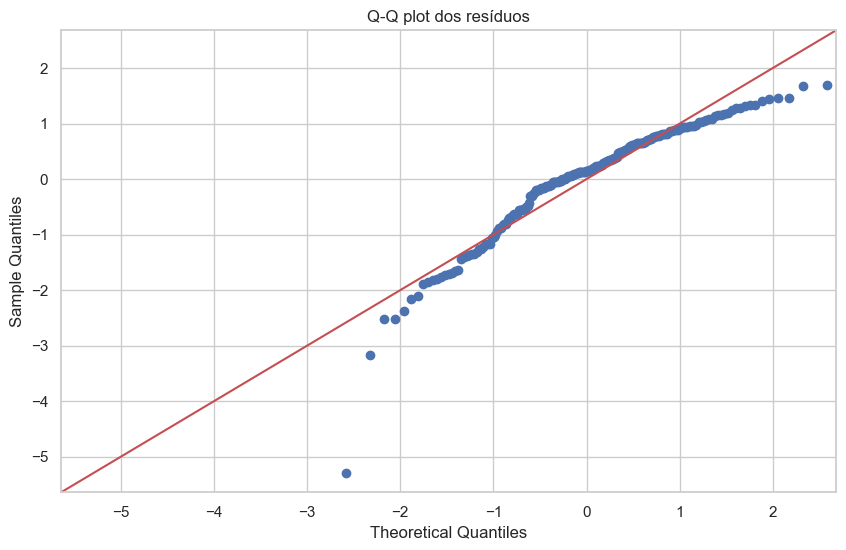

In [43]:
sm.qqplot(results.resid, line="45", fit=True)
plt.title("Q-Q plot dos resíduos")
plt.show()


In [44]:
from statsmodels.stats.stattools import durbin_watson

residual_mean = results.resid.mean()
dw_stat = durbin_watson(results.resid)

print(f"Média dos resíduos: {residual_mean:.4f}")
print(f"Estatística de Durbin-Watson: {dw_stat:.2f}")


Média dos resíduos: -0.0000
Estatística de Durbin-Watson: 2.08


## 5. Análise de multicolinearidade
Calculamos o Fator de Inflação da Variância (VIF) para cada preditor e verificamos a presença de correlações fortes entre variáveis explicativas.


In [45]:
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame({
    "variavel": X_with_const.columns,
    "VIF": [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
})

vif_data


,variavel,VIF
0,const,6.848900
1,TV,1.004611
2,Radio,1.144952
3,Jornal,1.145187


## 6. Análise do modelo
Sintetizamos os principais resultados para avaliar a qualidade do ajuste e a utilidade do modelo em termos de acurácia e interpretação.


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y, results.fittedvalues)
mse = mean_squared_error(y, results.fittedvalues)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, results.fittedvalues)

pd.DataFrame({
    "Métrica": ["R²", "RMSE", "MAE"],
    "Valor": [r2, rmse, mae]
})


,Métrica,Valor
0,R²,0.897211
1,RMSE,1.668570
2,MAE,1.252011
